<a href="https://colab.research.google.com/github/KringeKrimson/Pytorch-Basics/blob/main/albumentation_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Why albumentations?
- It is faster than torchvision
- It is better at segmentation and other stuff.

#Mount into google drive and set the correct path

In [38]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd /content/drive/My\ Drive/Colab_Notebooks

/content/drive/My Drive/Colab_Notebooks


#Import the required libaries

In [3]:
import cv2
import albumentations as A
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


#Helper function to display images

In [57]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)
    plt.show()


def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


# From https://albumentations.ai/docs/examples/example_bboxes/
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img

#Augmentation for classification tasks


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


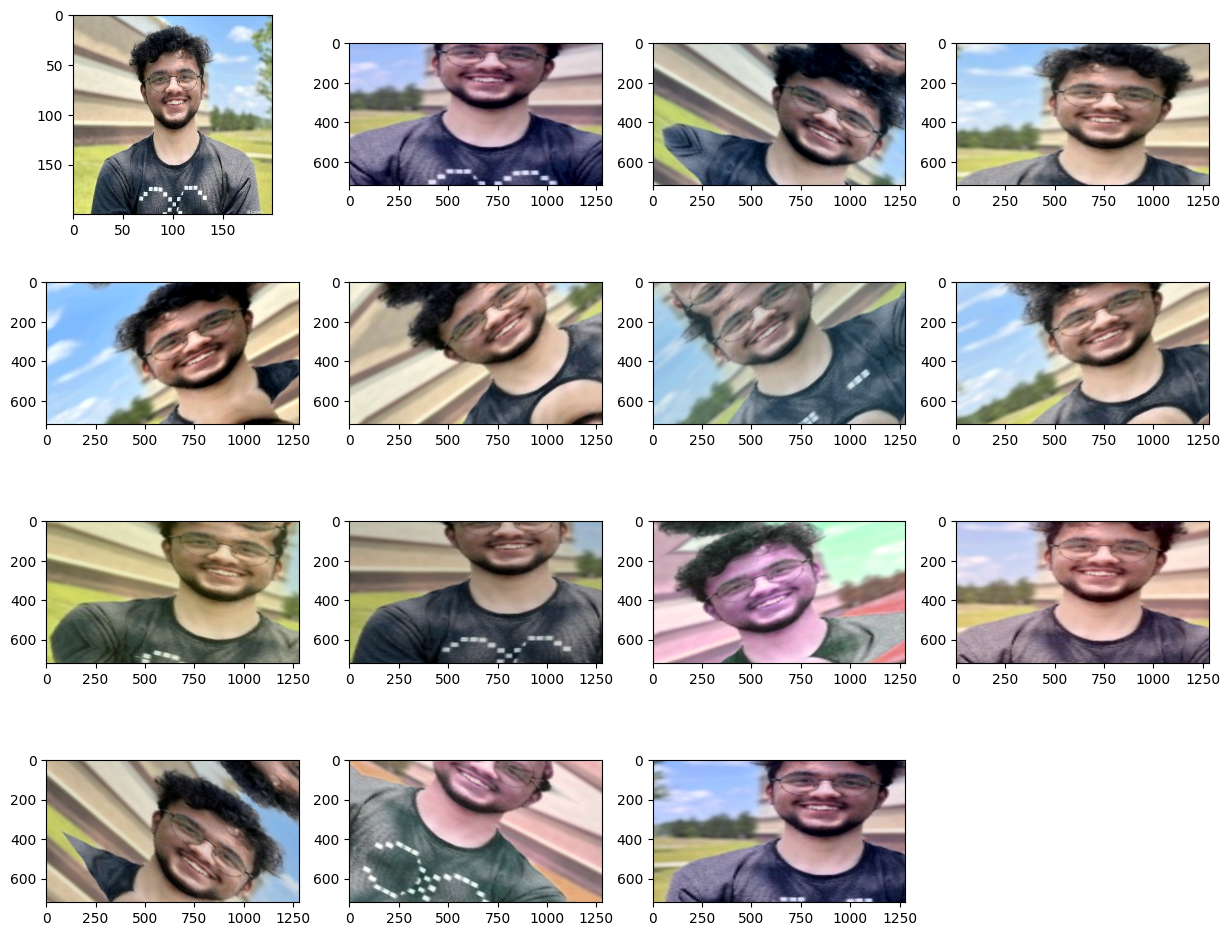

In [33]:
image = Image.open("images/bora.jpg")
# Defining the augmentation function
transform = A.Compose( #give dictionary
    [
        A.Resize(width=1920,height=1080),
        A.HorizontalFlip(p=0.5),
        A.RandomCrop(width=1280,height=720),
        A.Rotate(limit=40, p=0.9),  # (degrees, probability) Default is Mirror you could change it to constant using border_mode = cv2.BORDER_CONSTANT
        A.RandomBrightnessContrast(p=0.2),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25,p=0.2), #shift by value in 0 to 255
        A.OneOf(#Apply any one of them randomly their specified probabilities must sum to the p at the end
            [
                A.RandomContrast(),
                A.RandomGamma(),
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.2),
                A.Sharpen(p=0.2),
            ],
            p=0.9,
        ),
    ]
)
# passing the image to our augmentation function
images_list = [image]  # converting to list
image = np.array(image) # converting to numpy array
for i in range(15):
  augmentations = transform(image=image) #returns dictionary
  augmented_image = augmentations["image"]
  images_list.append(augmented_image)
plot_examples(images_list)

#Augmentation for segmentation task
Everything is same just add the mask image.

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


ValueError: num must be an integer with 1 <= num <= 20, not 21

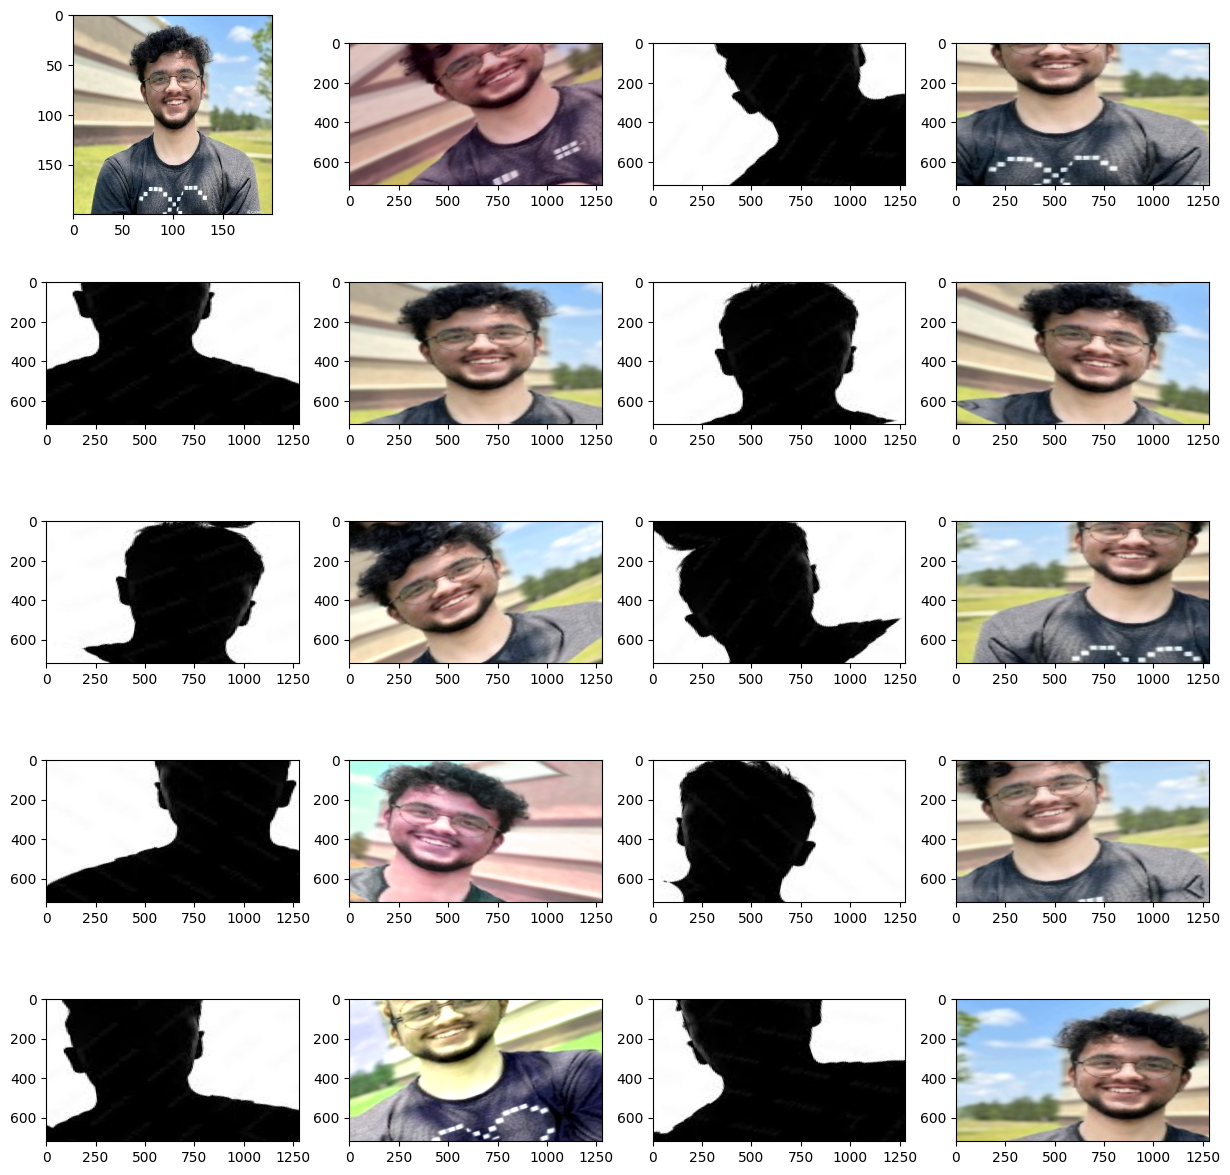

In [43]:
image = Image.open("images/bora.jpg")
mask = Image.open("images/mask.jpg")
# Defining the augmentation function
transform = A.Compose( #give dictionary
    [
        A.Resize(width=1920,height=1080),
        A.HorizontalFlip(p=0.5),
        A.RandomCrop(width=1280,height=720),
        A.Rotate(limit=40, p=0.9),  # (degrees, probability) Default is Mirror you could change it to constant using border_mode = cv2.BORDER_CONSTANT
        A.RandomBrightnessContrast(p=0.2),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25,p=0.2), #shift by value in 0 to 255
        A.OneOf(#Apply any one of them randomly their specified probabilities must sum to the p at the end
            [
                A.RandomContrast(),
                A.RandomGamma(),
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.2),
                A.Sharpen(p=0.2),
            ],
            p=0.9,
        ),
    ], is_check_shapes=False #so it approves even when the mask and the image has different height and width
)
# passing the image to our augmentation function
images_list = [image]  # converting to list
image = np.array(image) # converting to numpy array
mask = np.array(mask) # convert to numpy array
#mask2 = np.array(mask2)
for i in range(15):
  augmentations = transform(image=image, mask=mask) #this time add mask too   #Apparently height and width of image and its mask should be equal
  #augmentations = transform(image=image, mask=[mask,mask2]) # for multiple masks
  augmented_image = augmentations["image"]
  augmented_mask = augmentations["mask"]
  images_list.append(augmented_image)
  images_list.append(augmented_mask) #[0] if multiple
  #images_list.append(augmented_mask[1])
plot_examples(images_list)

#Augmentation for object detection

In [66]:
def plot_examples_chatgpt(images_list, saved_bboxes):
    num_images = len(images_list)
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # Adjust dimensions based on your preference

    for i in range(num_images):
        ax = axes[i // 5, i % 5]
        ax.imshow(images_list[i])
        ax.axis('off')

        bbox = saved_bboxes[i]
        if bbox:  # Check if there's a bounding box
            x_min, y_min, x_max, y_max = bbox
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    plt.tight_layout()
    plt.show()

In [69]:
#loading images via openCV
image = cv2.imread("images/cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # due to historical reasons opencv reads images and in BGR instead of RBG so need to convert
bboxes_not_normalized = [[13,170,224,410]]
# Get image dimensions
img_height, img_width = image.shape[:2]

# Normalize bounding box coordinates
bboxes = [
    [bbox[0] / img_width, bbox[1] / img_height, bbox[2] / img_width, bbox[3] / img_height]
    for bbox in bboxes_not_normalized
]

# Pascal_voc (x_min, y_min, x_max, y_max) Basically top left and bottom right coordinates
# YOLO, COCO stupid af names and other formats

transform = A.Compose( #give dictionary
    [
        A.Resize(width=1920,height=1080),
        A.HorizontalFlip(p=0.5),
        A.RandomCrop(width=1280,height=720),
        A.Rotate(limit=40, p=0.9),  # (degrees, probability) Default is Mirror you could change it to constant using border_mode = cv2.BORDER_CONSTANT
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25,p=0.2), #shift by value in 0 to 255
        A.OneOf(#Apply any one of them randomly their specified probabilities must sum to the p at the end
            [
                A.RandomGamma(),
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.2),
                A.Sharpen(p=0.2),
            ],
            p=0.9,
        ),
    ], bbox_params=A.BboxParams(format='pascal_voc', min_area=2048, min_visibility=0.3, label_fields=[]) #define the format for bbox currently in use
)                               # format,  minimum area in terms of pixel per sq, minimum percestage of visibility
# passing the image to our augmentation function
images_list = [image]  # converting to list
'''
Dont have to convert to np.array because we are using openCV here
image = np.array(image) # converting to numpy array'''
saved_bboxes = [bboxes[0]]
for i in range(15):
  augmentations = transform(image=image,bboxes=bboxes) #returns dictionary
  augmented_image = augmentations["image"]
  if len(augmentations["bboxes"]) ==0: #because some are dropped due to not meeting the min_area or min_visibility criteria?
    continue
  images_list.append(augmented_image)
  saved_bboxes.append(augmentations["bboxes"][0]) #if there was mutiple bboxes then we would not have had [0] just the normal with list of list  since its just one we need to do [0]
plot_examples(images_list, saved_bboxes)

<Figure size 1500x1500 with 0 Axes>

#Full PyTorch implementation

#Import the additional libraries

In [ ]:
import torch.nn as nn
from albumentations.pytorch import ToTensorV2
import os
from torch.utils.data import Dataset

#Actual Model

In [ ]:
class ImageFolder(Dataset):
  def __init__(self, root_dir, transform=None): #root directory contains cat and dogs images from folder
    super(ImageFolder, self).__init__()
    self.data = [] #basic idea we what self.data to go through all the image files in cat and dog folders and put labels to cats and dogs 0 for cats and 1 for dogs
    self.root_dir = root_dir
    self.transform = transform
    self.class_names = os.listdir(root_dir) # just cats and dogs folder names

    for index, name in enumerate(self.class_names):
      files = os.path.join(root_dir, name)
      self.data += list(zip(files, [index] * len(files))) # Now self.data  has [(cat_0.jpg,0),..... (dog_0.jpg,1)]

    def __len__(self):
      return len(self.data)

    def __get_item__(self, index):
      image_path, label = self.data[index]
      root_and_dir = os.path.join(self.root_dir,self.class_names[label])
      image = np.array(Image.open(os.path.join(root_and_dir, image_path)))
      if self.transform is not None:
        image = self.transform(image=image)["image"]
      return image, label

transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf(
            [
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.5),
            ],
            p=1.0,
        ),
        A.Normalize(
            mean=[0, 0, 0],   #here normalizing as in normalized_x = (x- mean)/std
            std=[1, 1, 1],
            max_pixel_value=255,
        ),
        ToTensorV2(), #converts numpy array to pytorch tensor
    ]
)

dataset = ImageFolder(root_dir="images", transform=transform)

for x,y in dataset:
  print(x.shape)